# Start!

In [22]:
import dataset as dt
import config
import edit_rules as er
import model as m

import numpy as np
import pandas as pd
import random
import json
import csv
import matplotlib.pyplot as plt; plt.rcdefaults()

# Settings

In [23]:
saveDir = "/home/rnasfi/Documents/data_repair/paper/ieee_review/ACCESS_latex_template_20240429"

In [24]:
data_labels = {}
data_keys = {}

datasets = {'trials_design': config.datasets[0], 'trials_population': config.datasets[1], 'allergens': config.datasets[2]}
td, data_labels['trials_design'], features, data_keys['trials_design'] = dt.get_datasetSchema('trials_design')
tp, data_labels['trials_population'], features, data_keys['trials_population'] = dt.get_datasetSchema('trials_population')
al, data_labels['allergens'], features, data_keys['allergens'] = dt.get_datasetSchema('allergens')

dataname = [td, tp, al]

data_index = 1
# xticks representing the labels for specific dataset
y_pos = np.arange(len(data_labels[dataname[data_index]]))

# ML model that perform the best for specific dataset
ml = m.get_best_ml(data_index)
ml

'tf-idf-xgboost'

List of a positions for each attribute in a dataset ordered by their type

In [25]:
# xticks that specify for the trials design dataset whether it is arms or not
y_pos1_cat = np.arange(len(td)-1)
y_pos1_num = len(td) # The last position for the numerical/multiclass attribute

# the width of the bars
width = 0.4 

In [26]:
print(y_pos1_num)

13


In [27]:
mls = ['count-vect-mnb','count-vect-logistic_regression',
  'count-vect-xgboost', 'bert-ann', 'tf-idf-mnb', 'tf-idf-logistic_regression', 'tf-idf-xgboost']

mls1 = ['BOW-MNB','BOW-LR',
  'BOW-XGBOOST', 'BERT-ANN', 'TF-IDF-MNB', 'TF-IDF-LR', 'TF-IDF-XGBOOST']

mls2 = [r'ML($\tau_a$)','BOW-LR',
  'BOW-XGBOOST', 'BERT-ANN', 'TF-IDF-MNB', 'TF-IDF-LR', 'TF-IDF-XGBOOST']

In [28]:
repair_strategies = ['with_constraints', 'with_parker']
repair_strategies_naming = ['ML', 'Parker then ML']

# Read data

Read Train

In [29]:
parker = False
traind = dt.read_data_csv(td, "train", parker)
trainp = dt.read_data_csv(tp, "train", parker)
traina = dt.read_data_csv(al, "train", parker)

dtest = {
 'trials_design': traind, 'trials_population': trainp, 'allergens': traina  
}

relative path ./data/trials_design --before delete (64211, 14)
--after delete (33508, 14)
relative path ./data/trials_population --before delete (17944, 16)
--after delete (14607, 16)
relative path ./data/allergens --before delete (1337, 14)
--after delete (1333, 14)


Read Test

In [30]:
testd = dt.read_test_csv(dataname[0], parker)
testp = dt.read_test_csv(dataname[1], parker)
testa = dt.read_test_csv(dataname[2], parker)

relative path ./data/trials_design --before delete (2868, 22)
--after delete (2868, 22)
relative path ./data/trials_population --before delete (1269, 23)
--after delete (1269, 23)
relative path ./data/allergens --before delete (298, 20)
--after delete (298, 20)


Read GS

In [31]:
gsd = dt.read_gs_csv(dataname[0])
gsp = dt.read_gs_csv(dataname[1])
gsa = dt.read_gs_csv(dataname[2])

# Raha Holoclean

Read repaired

In [32]:
repairs = ["bclean", "raha"]
r = 0
data_index = 0
keys = data_keys[dataname[data_index]]
labels = data_labels[dataname[data_index]]

fileName1 = f'./data/{dataname[data_index]}/{dataname[data_index]}_{repairs[r]}.csv'
fileName2 = f'./data/{dataname[data_index]}/{dataname[data_index]}_test.csv'
print(fileName1)

d1 = pd.read_csv(fileName1, sep = ",")
d2 = pd.read_csv(fileName2, sep = ",")
# d1 = d1[d1[keys[0]].isin(d2[keys[0]])]
print('test data',d2.shape, f'{repairs[r]} data', d1.shape)

d2[data_labels[dataname[data_index]] + keys]

./data/trials_design/trials_design_bclean.csv
test data (2868, 22) bclean data (2868, 10)


,parallel_group,crossover,randomised,controlled,open,double_blind,single_blind,arms,eudract_number,protocol_country_code
0,NaN,NaN,Yes,Yes,Yes,No,No,NaN,2004-000232-91,ES
1,NaN,NaN,Yes,Yes,Information not present in EudraCT,Information not present in EudraCT,Information not present in EudraCT,NaN,2004-000232-91,FI
2,NaN,NaN,Yes,Yes,Yes,No,No,NaN,2004-000232-91,IT
3,No,No,Yes,Yes,Yes,No,No,NaN,2004-001307-35,GB
4,No,No,Yes,Yes,Yes,No,No,NaN,2004-002203-32,GB
...,...,...,...,...,...,...,...,...,...,...
2863,Yes,No,Yes,Yes,No,Yes,No,2+,2017-003723-29,SE
2864,Yes,No,Yes,Yes,No,Yes,No,2+,2017-003723-29,SK
2865,Yes,No,Yes,Yes,No,Yes,No,2+,2017-003723-29,AT
2866,Yes,No,Yes,Yes,No,Yes,No,2+,2017-003723-29,PT


In [33]:
d1 = d1.replace({'A Null Cell': np.nan})
d2 = d2.replace({None: np.nan})
d = d1.copy()
# d1.to_csv(fileName1, index=False, quoting=csv.QUOTE_NONNUMERIC)
d

,eudract_number,open,single_blind,double_blind,randomised,crossover,parallel_group,arms,controlled,protocol_country_code
0,2004-000232-91,Yes,No,No,Yes,No,Yes,2+,Yes,ES
1,2004-000232-91,Information not present in EudraCT,Information not present in EudraCT,Yes,Yes,No,No,2+,Yes,FI
2,2004-000232-91,Yes,No,No,Yes,No,Yes,2+,Yes,IT
3,2004-001307-35,Yes,No,No,Yes,No,Yes,2+,Yes,GB
4,2004-002203-32,Yes,No,No,Yes,No,Yes,2+,Yes,GB
...,...,...,...,...,...,...,...,...,...,...
2863,2017-003723-29,No,No,Yes,Yes,No,Yes,2+,Yes,SE
2864,2017-003723-29,No,No,Yes,Yes,No,Yes,2+,Yes,SK
2865,2017-003723-29,No,No,Yes,Yes,No,Yes,2+,Yes,AT
2866,2017-003723-29,No,No,Yes,Yes,No,Yes,2+,Yes,PT


# Repair per label

Fill lists with the results of the repair for each strategy.

In [16]:
strategies_n = {'ML classification': r'ML($\tau_a$)',
                'parker': 'Parker', 'bclean': 'BClean', 
                'raha':'Raha+Baran',                
                'ML classification and then Parker Algorithm':r'ML($\tau_a$) then Parker',                  
                'Parker Algorithm then ML classification':r'Parker then ML($\tau_a$)',                
               }

ML classification 0
parker 1
bclean 2
raha 3
ML classification and then Parker Algorithm 4
Parker Algorithm then ML classification 5


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


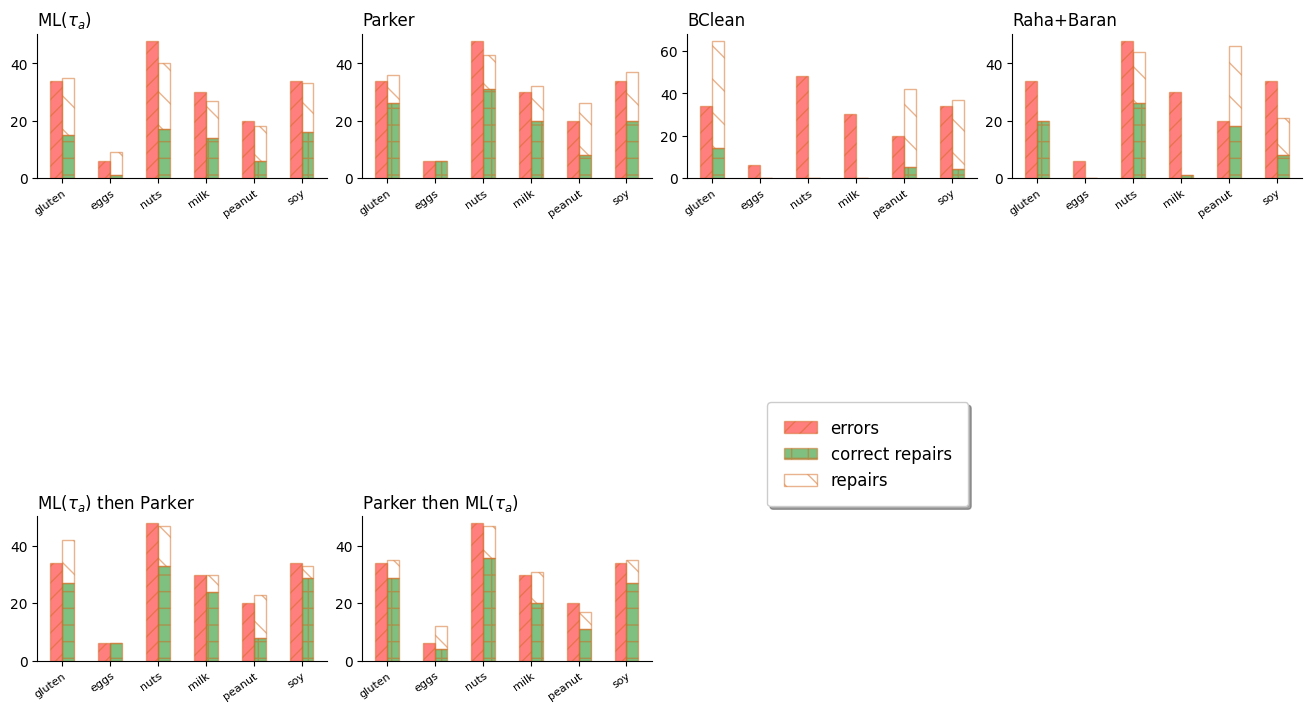

In [17]:
data_index = 2
dname = dataname[data_index]

err = {}
ml_cst = {}
ml_results = {}
mls_results = {}

f = open(f"./results/{dname}/{dname}_per_label_metrics.json")
# f = open(f"./results/{dataname}/results_training_ml.json")

# returns JSON object as 
# a dictionary
data = json.load(f)
f.close()

# 2 rows for figures where each have at most graphs to display
fig, ax = plt.subplots(2,4, figsize=(13,7), layout='constrained')
i = 0 # index nb of graphs/method
j = 0 # index for rows
k = 0

# iterate through the strategies
for i, m in enumerate(strategies_n.keys()):
    print(m, i)
    reps = []
    crs = []
    errors = []
    labels = []
    # iterate for the current method-for labels
    for ind, method in enumerate(data['repair methods']):
        if m == method['repair method']:
            a = method['key']
            err[a] = method['Number of errors']
            errors.append(err[a])
            crs.append(method['Number of correct repairs'])
            reps.append(method['Number of repairs'])
            labels.append(a)
            
    y_pos = np.arange(len(labels))
    
#     print('i', i, 'j', j, 'k', k)
    if i == 4: # reached the displaying 4 grphs already
        j = 1        
        k = 0 
            
    width = 0.125
    recterr = ax[j][k].bar(y_pos -  width , errors, width = 2*width, align='center', 
                       alpha=0.5, color = 'red', edgecolor='chocolate', hatch = '//',\
                    label = 'errors') #     
     # repair with constraint check for each label
    rectcr = ax[j][k].bar(y_pos +  width, np.array(crs), 
                           width = 2*width, align='center', \
                   alpha=0.5, color = 'g', edgecolor='chocolate', hatch = '+',\
                label = 'correct repairs')
    rectr = ax[j][k].bar(y_pos +  width, np.array(reps) - np.array(crs), 
                          width = 2*width, align='center', \
                   alpha=0.5, edgecolor='chocolate', hatch = '\\', fill=False,\
                bottom= np.array(crs), label = 'repairs')


    ax[j][k].spines[['top','right']].set_visible(False)
    ax[j][k].set_xticks(y_pos, labels=labels, fontsize=8)
    ax[j][k].set_title(strategies_n[m], loc = 'left')
    ax[j][k].set_xticks(y_pos, labels=labels, rotation=75, fontsize=8)                
    
    plt.setp(ax[j][k].get_xticklabels(), rotation=35, ha="right", rotation_mode="anchor")
   
    k += 1
    
    if k in [2,3] and j ==1 : 
        break
#     print()

for c in range(k, 4):ax[j][c].set_visible(False) 

ax[j-1][k].legend(fontsize=12, fancybox=True, framealpha=1, frameon=True, shadow=True, borderpad=1, 
                  bbox_to_anchor=(1., -1.5))

plt.savefig(f'{saveDir}/{dname}_repairs_per_strategy.eps', format='eps')
plt.savefig(f'./figs/{dname}/{dname}_repairs_per_strategy.eps', format='eps')
plt.show()

#  Error per class

get erreneous instances per class for each dataset

In [15]:
# trial design
err_classd_yes = []
err_classd_no = []
### arms
err_classd2 = []
err_classd1 = []
err_classd0 = []
# population category in the clinical trials
err_classp1 = []
err_classp0 = []
# allergen
err_classa2 = []
err_classa1 = []
err_classa0 = []
avg = 0
# get amount of erreneous for each trial design
for a in ct: 
    avg +=  testd[(testd[a] != testd[a + '_gs'])].shape[0]
    if a!= 'arms':
        err_classd_yes.append(testd[(testd[a] != testd[a + '_gs'])&(testd[a + '_gs'] == 'Yes')].shape[0])
        err_classd_no.append(testd[(testd[a] != testd[a + '_gs'])&(testd[a + '_gs'] == 'No')].shape[0])
    else:
        err_classd2.append(testd[(testd[a] != testd[a + '_gs'])&(testd[a + '_gs'] == '2+')].shape[0])
        err_classd1.append(testd[(testd[a] != testd[a + '_gs'])&(testd[a + '_gs'] == '1')].shape[0])
        err_classd0.append(testd[(testd[a] != testd[a + '_gs'])&(testd[a + '_gs'] == '0')].shape[0])        
print('eudact',avg, avg/len(ct), avg/len(population)/ testd.shape[0])

avg = 0
# get amount of erreneous for each population category in the clinical trials
for a in population:
    avg +=  testp[(testp[a] != testp[a + '_gs'])].shape[0]
    # should be equal to 1
    err_classp1.append(testp[(testp[a] != testp[a + '_gs'])&(testp[a + '_gs'] == 1)].shape[0])
    err_classp0.append(testp[(testp[a] != testp[a + '_gs'])&(testp[a + '_gs'] == 0)].shape[0])
print('trials population', avg, avg/len(population), avg/len(population)/ testp.shape[0])

avg = 0
# get amount of erreneous for each allergen
for a in allergens: 
    avg +=  testa[(testa[a] != testa[a + '_gs'])].shape[0]
    err_classa2.append(testa[(testa[a] != testa[a + '_gs'])&(testa[a + '_gs'] == 2.0)].shape[0])
    err_classa1.append(testa[(testa[a] != testa[a + '_gs'])&(testa[a + '_gs'] == 1.0)].shape[0])
    err_classa0.append(testa[(testa[a] != testa[a + '_gs'])&(testa[a + '_gs'] == 0.0)].shape[0])
print('allergens', avg, avg/len(allergens), avg/len(allergens)/ testa.shape[0])

eudact 2459 307.375 0.12248455867702729
trials population 496 70.85714285714286 0.05583699200720477
allergens 172 28.666666666666668 0.09619686800894856


686 19674.48
226 6481.68
121 3470.28
118 3384.24
141 4043.88
130 3728.4
139 3986.52


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


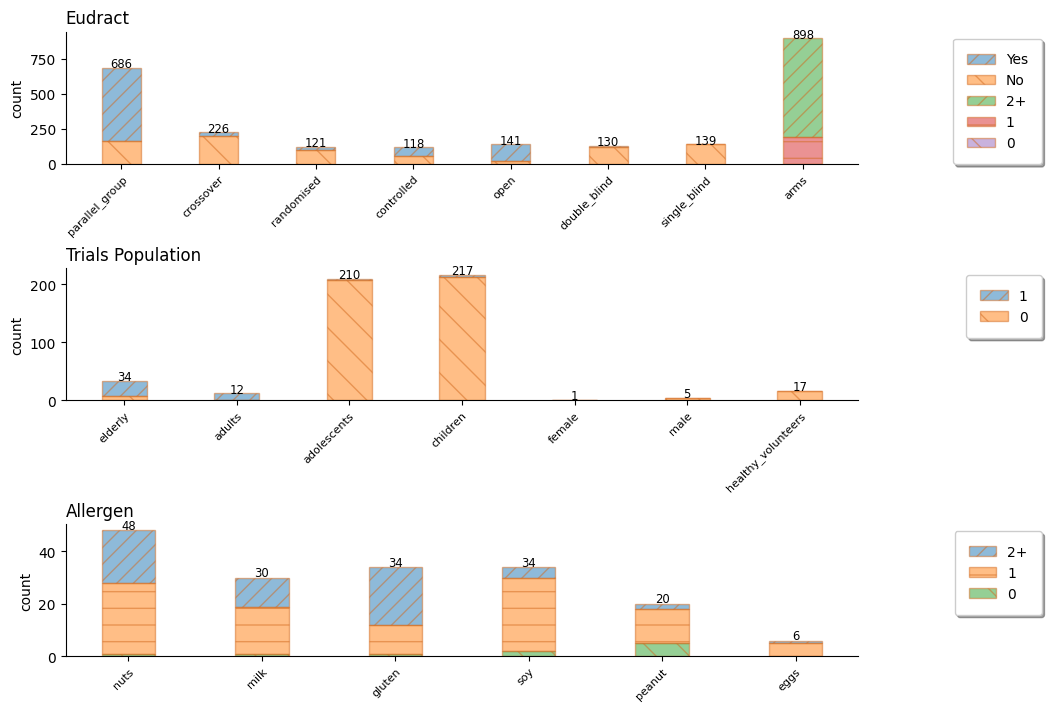

In [17]:
fig, ax = plt.subplots(3, 1, figsize=(10.4, 7), layout='constrained')

width = 0.4 # the width of the bars

# trial design
rectsyes = ax[0].bar(y_pos1_cat, err_classd_yes, width = width, align='center', alpha=0.5, bottom=np.array(err_classd_no), 
                     edgecolor='chocolate', hatch = '//',
                label = 'Yes')
rectsno = ax[0].bar(y_pos1_cat, err_classd_no, width = width, align='center',
                    alpha=0.5, edgecolor='chocolate', hatch = '\\',
                label = 'No')
rects2 = ax[0].bar(len(ct)-1, err_classd2, width = width, align='center', 
                   bottom=np.array(err_classd0) + np.array(err_classd1), 
                   alpha=0.5, edgecolor='chocolate', hatch = '//',\
                label = '2+')
rects1 = ax[0].bar(len(ct)-1, err_classd1, width = width, align='center', bottom=np.array(err_classd0), 
                   alpha=0.5, edgecolor='chocolate', hatch = '-',\
                label = '1')
rects0 = ax[0].bar(len(ct)-1, err_classd0, width = width, align='center', 
                   alpha=0.5, edgecolor='chocolate', hatch = '\\',\
                label = '0')
#population
rectsp0 = ax[1].bar(y_pos2, err_classp1, width = width, align='center', alpha=0.5, bottom=np.array(err_classp0), 
                     edgecolor='chocolate', hatch = '//',
                label = '1')
rectsp1 = ax[1].bar(y_pos2, err_classp0, width = width, align='center',
                    alpha=0.5, edgecolor='chocolate', hatch = '\\',
                label = '0')
# allergens
rectsa2 = ax[2].bar(y_pos3, err_classa2, width = width, align='center', 
                   bottom= np.array(err_classa0) + np.array(err_classa1), 
                   alpha=0.5, edgecolor='chocolate', hatch = '//',\
                label = '2+')
rectsa1 = ax[2].bar(y_pos3, err_classa1, width = width, align='center', bottom=np.array(err_classa0), 
                   alpha=0.5, edgecolor='chocolate', hatch = '-',\
                label = '1')
rectsa0 = ax[2].bar(y_pos3, err_classa0, width = width, align='center', 
                   alpha=0.5, edgecolor='chocolate', hatch = '\\', label = '0')

# eudract
for i, p in enumerate(rectsyes): 
    height = p.get_height() + rectsno[i].get_height()
    print(height, height*2868/100)
    ax[0].text(x=p.get_x() + p.get_width() / 2, y=height+0.5, s="{}".format(height), ha='center',\
                fontsize='small')
for  i, p in enumerate(rects2):   
    height = p.get_height() + rects1[i].get_height() + rects0[i].get_height()
    ax[0].text(x=p.get_x() + p.get_width() / 2, y=height+0.5, s="{}".format(height), ha='center',\
                fontsize='small') 
#population
for i, p in enumerate(rectsp1):   
    height = p.get_height() + rectsp0[i].get_height()
    ax[1].text(x=p.get_x() + p.get_width() / 2, y=height+0.5, s="{}".format(height), ha='center',\
                fontsize='small')
# allergens
for  i, p in enumerate(rectsa2):   
    height = p.get_height() + rectsa1[i].get_height() + rectsa0[i].get_height()
    ax[2].text(x=p.get_x() + p.get_width() / 2, y=height+0.5, 
               s="{}".format(height), ha='center',\
                fontsize='small')


ax[0].set_xticks(np.arange(len(ct)), labels=ct, fontsize=8)
ax[1].set_xticks(y_pos2, labels=population, fontsize=8)
ax[2].set_xticks(y_pos3, labels=allergens, fontsize=8)


plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax[2].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax[0].set_ylabel('count')
ax[1].set_ylabel('count')
ax[2].set_ylabel('count')

ax[0].spines[['top', 'right']].set_visible(False)
ax[0].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, bbox_to_anchor=(1.24, 1))
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, bbox_to_anchor=(1.24, 1))
ax[2].spines[['top', 'right']].set_visible(False)
ax[2].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, bbox_to_anchor=(1.24, 1))

ax[0].set_title('Eudract', loc = 'left')
ax[1].set_title('Trials Population', loc = 'left')
ax[2].set_title('Allergen', loc = 'left')

#plt.xlim(-0.5)
plt.savefig(f'./figs/err_per_class_label.eps', format='eps')
#plt.savefig(f'{saveDir}/err_per_class_label.eps', format='eps')
plt.show()

# Class imbalance

In [11]:
dfd = pd.concat([traind, testd], ignore_index=True)
dfp = pd.concat([trainp, testp], ignore_index=True)
dfa = pd.concat([traina, testa], ignore_index=True)

In [12]:
def remove(train, partial_key, labels, data_index, nbclass):
    train.dropna(subset= [d for d in labels], inplace=True)
    print('old shape', train.shape)
    for label in labels:
        train = train[(train[label] == 'Yes') | (train[label] == 'No')\
                     | (train[label] == '2+')| (train[label] == '1')| (train[label] == '0')\
                     | (train[label] == 1)| (train[label] == 0)\
                     | (train[label] == 2)| (train[label] == 1)| (train[label] == 0)]
        
    print('new shape', train.shape)
    
    yclass = []
    nclass = []
    class0 = []
    class1 = []
    class2 = []
    ir = []
    
    codes ={}
#     print("before", train.shape)
    grouped = train.groupby(partial_key).agg(set)
    for label in labels:
        dtrain = train.copy()
        
        class_counts = dtrain[label].value_counts()
        ir.append(round(class_counts.min()/class_counts.max(), 2) )
        
        if nbclass == 2 :
            yclass.append(round(dtrain[dtrain[label] == 1][label].shape[0]/sum(class_counts),2))
            nclass.append(round(dtrain[dtrain[label] == 0][label].shape[0]/sum(class_counts),2))
            
            
        if nbclass == 3 :
            class0.append(round(dtrain[dtrain[label] == 0][label].shape[0]/sum(class_counts),3))
            class1.append(round(dtrain[dtrain[label] == 1][label].shape[0]/sum(class_counts),3))
            class2.append(round(dtrain[dtrain[label] == 2][label].shape[0]/sum(class_counts),3))
            print(dtrain[dtrain[label] == 2][label].shape[0],\
                      dtrain[dtrain[label] == 1][label].shape[0],\
                      dtrain[dtrain[label] == 0][label].shape[0],\
                      sum(class_counts))            
        if nbclass == 0 :
            if label != 'arms':
                yclass.append(round(dtrain[dtrain[label] == 'Yes'][label].shape[0]/sum(class_counts),2))
                nclass.append(round(dtrain[dtrain[label] == 'No'][label].shape[0]/sum(class_counts),2))
            else:
                class0.append(round(dtrain[dtrain[label] == '0'][label].shape[0]/sum(class_counts),2))
                class1.append(round(dtrain[dtrain[label] == '1'][label].shape[0]/sum(class_counts),2))
                class2.append(round(dtrain[dtrain[label] == '2+'][label].shape[0]/sum(class_counts),2))


    if nbclass == 2 :       
        return yclass, nclass,ir
        
    elif nbclass == 3 : 
        return class2, class1, class0, ir
    else: 
        return yclass, nclass, class2, class1, class0, ir
        

In [13]:
dfdc = remove(traind,"eudract_number", ct, 0, 0)
dfpc = remove(trainp,"eudract_number", population, 1, 2)
dfac = remove(traina,"code", allergens, 2, 3)

old shape (33508, 14)
new shape (33314, 14)
old shape (14607, 16)
new shape (14607, 16)
old shape (1333, 14)
new shape (1333, 14)
143 261 929 1333
188 231 914 1333
321 85 927 1333
126 241 966 1333
28 113 1192 1333
37 62 1234 1333


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


7 0.0 [0.5, 0.04, 0.15, 0.14, 0.57, 0.61, 0.02, 0.0]
1.0
1.0
0.9999999999999998
1.001
1.0
1.0010000000000001


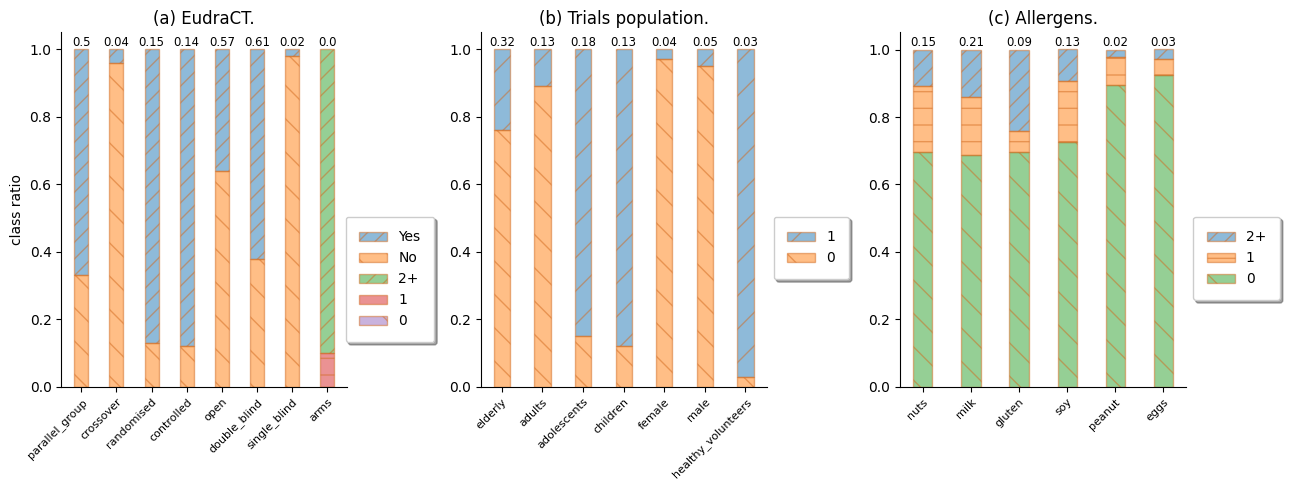

In [18]:
y_pos1_cat = np.arange(len(ct)-1)
y_pos1_num = len(ct)
y_pos2 = np.arange(len(population))
y_pos3 = np.arange(len(allergens))
width = 0.4  # the width of the bars

# fig, ax = plt.subplots(1, 3, figsize=(13, 5), layout='constrained')
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 5))
# fig.tight_layout() # Or equivalently,  "plt.tight_layout()"


# trial design
rectsyes = ax[0].bar(y_pos1_cat, dfdc[0], width = width, align='center', 
                    bottom=np.array(dfdc[1]), alpha=0.5, 
                     edgecolor='chocolate', hatch = '//',
                label = 'Yes')#class_countsd['Yes']
rectsno = ax[0].bar(y_pos1_cat, dfdc[1], width = width, align='center',
                    alpha=0.5, edgecolor='chocolate', hatch = '\\',
                label = 'No')# class_countsd['No']
rects2 = ax[0].bar(len(ct)-1, dfdc[2], width = width, align='center', 
                   bottom=np.array(dfdc[4]) + np.array(dfdc[3]), 
                   alpha=0.5, edgecolor='chocolate', hatch = '//',\
                label = '2+')#class_countsd['2+']
rects1 = ax[0].bar(len(ct)-1, dfdc[3], width = width, align='center', bottom=np.array(dfdc[4]), 
                   alpha=0.5, edgecolor='chocolate', hatch = '-',\
                label = '1')#class_countsd['1']
rects0 = ax[0].bar(len(ct)-1, dfdc[4], width = width, align='center', 
                   alpha=0.5, edgecolor='chocolate', hatch = '\\', label = '0')


                   
#population
rectsp0 = ax[1].bar(y_pos2, dfpc[1], width, alpha=0.5, bottom=np.array(dfpc[0]),\
                edgecolor='chocolate', hatch = '/',\
                label = '1')#class_countsp['0']
rectsp1 = ax[1].bar(y_pos2, dfpc[0], width, alpha=0.5, edgecolor='chocolate', hatch = "\\",\
                label = '0')# class_countsp['1']

# allergens
rectsa2 = ax[2].bar(y_pos3, dfac[0], width = width, align='center', 
                   bottom= np.array(dfac[2]) + np.array(dfac[1]), 
                   alpha=0.5, edgecolor='chocolate', hatch = '//',\
                label = '2+')#class_countsa['2']
rectsa1 = ax[2].bar(y_pos3, dfac[1], width = width, align='center', bottom=np.array(dfac[2]), 
                   alpha=0.5, edgecolor='chocolate', hatch = '-',\
                label = '1')
rectsa0 = ax[2].bar(y_pos3, dfac[2], width = width, align='center', 
                   alpha=0.5, edgecolor='chocolate', hatch = '\\', label = '0')




ax[0].set_ylabel('class ratio')

ax[0].set_xticks(np.arange(len(ct)), labels=ct, fontsize=8)
ax[1].set_xticks(y_pos2, labels=population, rotation=45, fontsize=8)
ax[2].set_xticks(y_pos3, labels=allergens, rotation=45, fontsize=8)
ax[0].spines[['top', 'right']].set_visible(False)
ax[1].spines[['top', 'right']].set_visible(False)
ax[2].spines[['top', 'right']].set_visible(False)
ax[0].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, bbox_to_anchor=(0.97, 0.5))
ax[1].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, bbox_to_anchor=(1, 0.5))
ax[2].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, bbox_to_anchor=(1, 0.5))
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax[2].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

ax[0].title.set_text('(a) EudraCT.')
ax[1].title.set_text('(b) Trials population.')
ax[2].title.set_text('(c) Allergens.')

# eudract
for i, p in enumerate(rectsyes): 
    height = p.get_height() + rectsno[i].get_height()
    ax[0].text(x=p.get_x() + p.get_width() / 2, y=height*1.01, s="{}".format(dfdc[5][i]), \
               ha='center', fontsize='small')
# for  i, p in enumerate(rects2):
## arms
i = i + 1
p = rects2[0]
print(ct.index('arms'), dfdc[5][i], dfdc[5])
height = p.get_height() + rects1[0].get_height() + rects0[0].get_height()
ax[0].text(x=p.get_x() + p.get_width() / 2, y=height*1.01, s="{}".format(dfdc[5][i]), \
           ha='center', fontsize='small') 

#population
for  i, p in enumerate(rectsp1):   
    height = p.get_height() + rectsp0[i].get_height()
    ax[1].text(x=p.get_x() + p.get_width() / 2, y=height*1.01, 
               s="{}".format(dfpc[2][i]), ha='center',\
                fontsize='small')
# allergens
for  i, p in enumerate(rectsa1):    
    height = p.get_height() + rectsa0[i].get_height() + rectsa2[i].get_height()
    print(height)
    ax[2].text(x=p.get_x() + p.get_width() / 2, y=height*1.01, 
               s="{}".format(dfac[3][i]), ha='center',\
                fontsize='small')

plt.tight_layout()
plt.savefig(f'./figs/class_per_label.eps', format='eps')
plt.show()

# Training Different ML models

### training runtime

In [ ]:
data_index = 0
attr = data_labels[datasets[data_index]]

f1 = open(f'./results/{datasets[data_index]}/results_training_ml.json')
r1 = json.load(f1)
f1.close()


for i in range(2):
    if i == 0: _with = 'with_constraints'
    if i == 1: _with = 'without_constraints'

    j = 0
    for ml in mls:
        rt = []
        prevt = 0 

        if 'bert' not in ml :
            for a in attr:
                prevt += r1[_with][ml][a]['duration_secs']
                rt.append(prevt)
        else:
            for a in attr:
                for e in range(len(r1[_with][ml][a]['epochs'])):
                    dur = r1[_with][ml][a]['epochs'][e]['duration_secs']
                    prevt += dur
                rt.append(prevt)                    

                
        fig, ax = plt.subplots()

        if data_index == 0: ax.plot( y_pos1, rt, label = f"EudraCT:{round(rt[len(rt) - 1],2)} secs" )
        if data_index == 1: ax.plot( y_pos2, rt, label = f"Trials population:{round(rt[len(rt) - 1],2)} secs" )
        if data_index == 2: ax.plot( y_pos3, rt, label = f"allergens:{round(rt[len(rt) - 1],2)} secs" )

        ax.set_title(mls1[j], loc = 'left')

        ax.legend()
        plt.show()
        print(j, ml, mls1[j], _with)
        j += 1
        
            

# prevtd, prevtp, prevta # (2187.159807, 1561.2234469999999, 5.605815)


### training best ml model runtime

In [ ]:
for i in range(1,2):
    if i == 0: _with = 'with_constraints'
    if i == 1: _with = 'with_parker'
    for j in range(3):
        runtimes = []
        
        dataname = datasets[j]
        ml = m.get_best_ml(j)
        labels = dataset[dataname]['labels']
        
        f = open(f"./results/{dataname}/results_training_best_ml.json")
        r = json.load(f)
        f.close()

        prevt = 0 
        for a in labels:
            prevt += r[_with][ml][a]['duration']
            runtimes.append(prevt)

        fig, ax = plt.subplots()

        if j == 0: ax.plot( y_pos1, runtimes, label = f"EudraCT:{round(runtimes[len(runtimes) - 1],2)} secs" )
        if j == 1: ax.plot( y_pos2, runtimes, label = f"Trials population:{round(runtimes[len(runtimes) - 1],2)} secs" )
        if j == 2: ax.plot( y_pos3, runtimes, label = f"allergens:{round(runtimes[len(runtimes) - 1],2)} secs" )

        ax.legend()
        plt.savefig(f'./figs/{dataname}/{dataname}_runtimes.eps', format='eps')
plt.show()

# prevtd, prevtp, prevta # (2187.159807, 1561.2234469999999, 5.605815)
labels, runtimes

# Evaluate robustness: 

different sources

In [20]:
def get_total_stats(dataset, ml, labels, range_sources):
    err = {}
    repairs = {}
    correct_repairs = {}
    precision = {}
    recall = {}
    f1 = {}

    f = open(f"./results/{dataset}/{dataset}_stats_{ml}_robustness.json")
    data = json.load(f)
    nb_samples = list(data.keys())
    print()

    for i, a in enumerate(labels) :
        err[i] = []
        precision[i] = []
        recall[i] = []
        f1[i] = []
        # for a specific nb of attributes, 
        # get the list errors for a different nb of samples
        for s in nb_samples:
#             print(s, str(i + 1), data[s])
            # the nb of attribute start from 1 and is saved in string format           
            err[i].append(data[s][str(i + 1)]['errors']) 
            
            repairs[a] = data[s][str(i + 1)]['repairs']
            correct_repairs[a] = data[s][str(i + 1)]['correct_repairs']
            
            if correct_repairs[a] > 0: precision[i].append(round(correct_repairs[a]/ repairs[a],2))
            else: precision[int(s)].append(0)
            
            if correct_repairs[a] > 0: recall[i].append(round(correct_repairs[a]/ err[i][int(s)],2))
            else: recall[i].append(0)
            
            if recall[i][int(s)] > 0 or precision[i][int(s)] > 0: 
                f1[i].append(round(2 * (recall[i][int(s)] * precision[i][int(s)]) / (recall[i][int(s)] + precision[i][int(s)]),2))
            else: f1[int(s)].append(0)

    
    f.close()
    return err,repairs, correct_repairs, precision, recall, f1

trials_design



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


trials_population



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


allergens



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


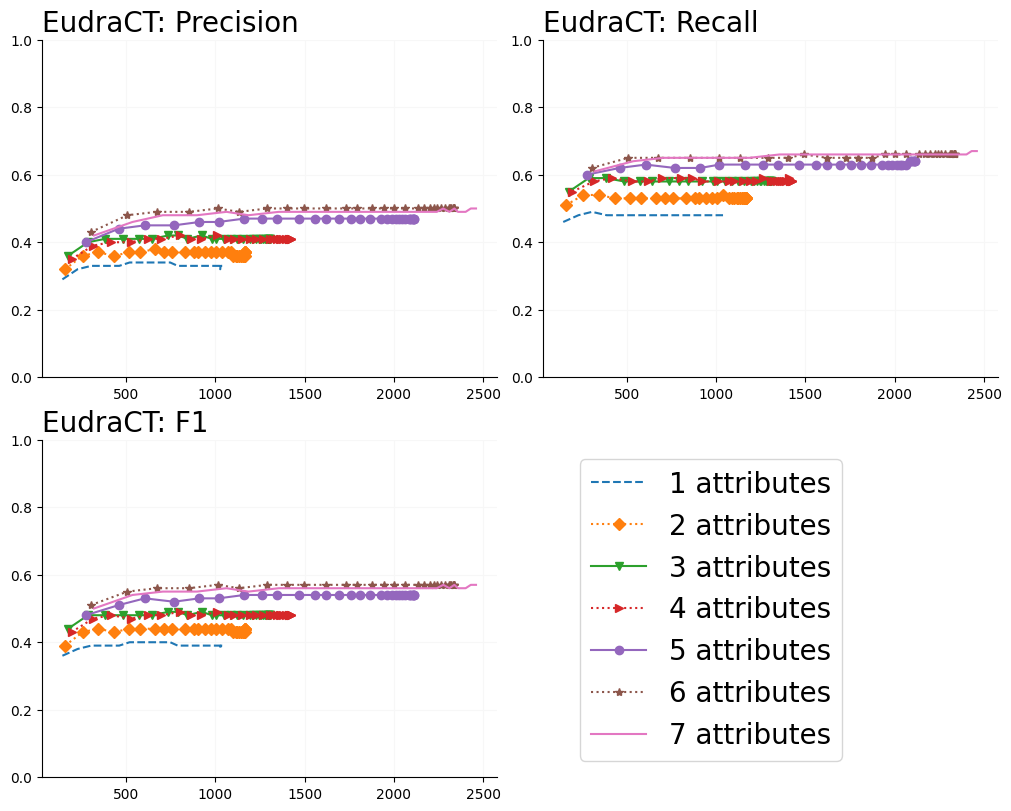

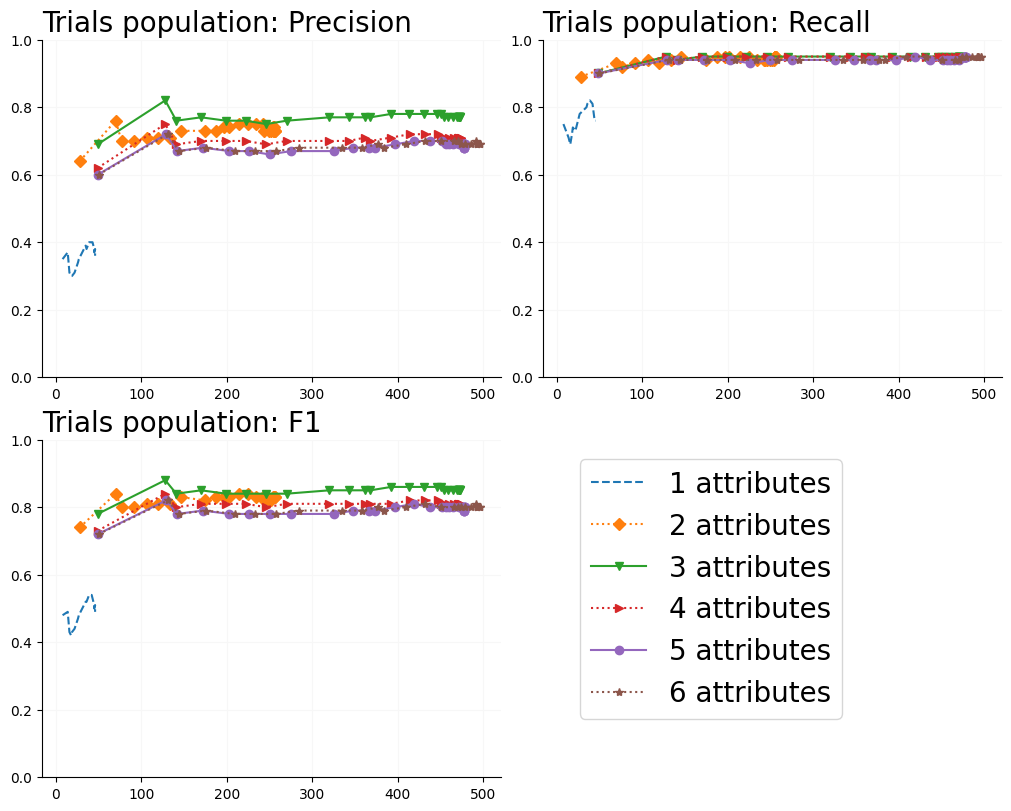

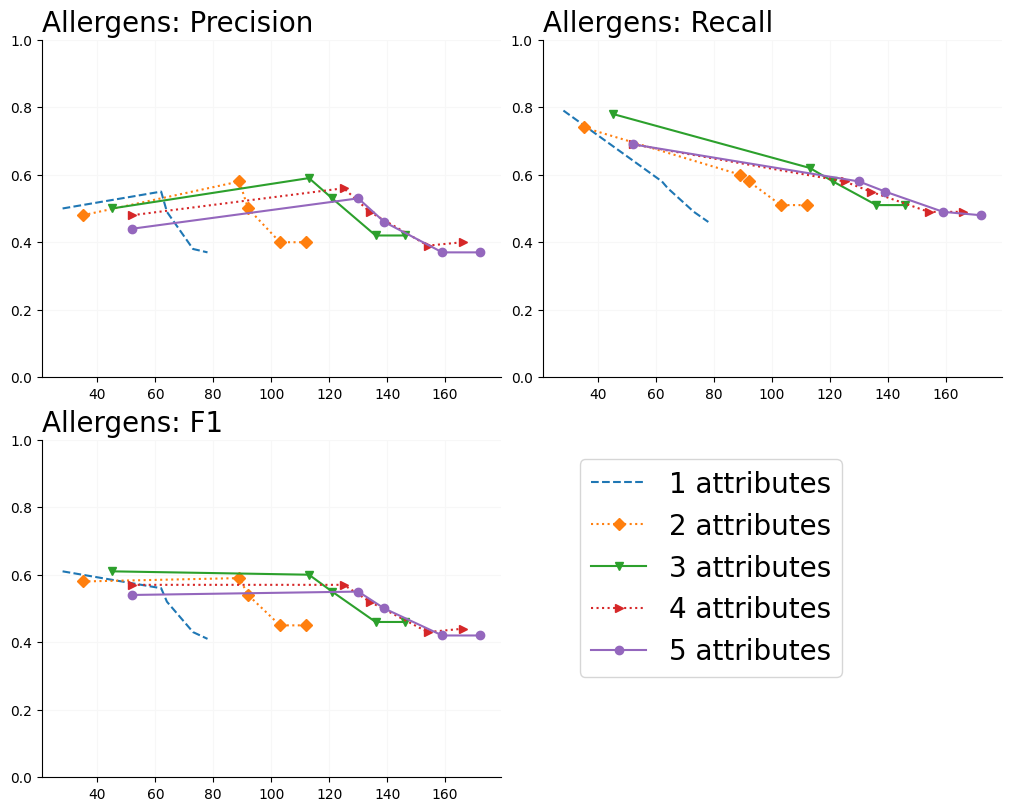

In [34]:
err = {}
repairs = {}
correct_repairs = {}
precision = {}
recall = {}
f1 = {}
dnames = ['EudraCT', 'Trials population', 'Allergens']
fontsize = 20
for j in range(len(datasets)):        
    d = dataname[j]
    
    ml = m.get_best_ml(j)
    labels = datasets[d]['labels']
    
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), layout='constrained')
#     for stra in repair_strategies:        
    print(d)
    sources = dtest[d][datasets[d]['keys'][1]].value_counts().keys()
#     print('size nb of cumul samples', len(sources))

    err[d],repairs[d], correct_repairs[d], precision[d], recall[d], f1[d] = \
    get_total_stats(d, ml, labels, [str(i) for i in [*range(len(sources))]])
    
    markers = ['--', 'D:', 'v-', '>:', 'o-', '*:', '-']
    for n in range(1,len(labels)):
        
        ax[0,0].plot(err[d][n], precision[d][n], markers[n - 1], label = f"{n} attributes" )
        ax[0][0].set_title(f"{dnames[j]}: Precision", loc = 'left', fontsize = fontsize)
        ax[0][0].spines[['top', 'right']].set_visible(False)
        
        ax[0,1].plot(err[d][n], recall[d][n], markers[n - 1])
        ax[0][1].set_title(f"{dnames[j]}: Recall", loc = 'left', fontsize = fontsize)
        ax[0][1].spines[['top', 'right']].set_visible(False)
        
        ax[1,0].plot(err[d][n], f1[d][n], markers[n - 1])
        ax[1][0].set_title(f"{dnames[j]}: F1", loc = 'left', fontsize = fontsize)
        ax[1][0].spines[['top', 'right']].set_visible(False)
#         ax.set(xlabel=f"amount errors")
#         ax.grid(True, color='0.85')
       

        ax[1][1].set_visible(False)
    ax[0][0].grid(True, color='0.97')
    ax[0][1].grid(True, color='0.97')
    ax[1][0].grid(True, color='0.97')
    ax[0][0].set_ylim(bottom=0, top=1.0)    
    ax[0][1].set_ylim(bottom=0, top=1.0)    
    ax[1][0].set_ylim(bottom=0, top=1.0)    
    
        

    fig.legend(fontsize=20, bbox_to_anchor=(0.85, 0.45), frameon=True) 
    plt.title(f"repair {d}")
    plt.savefig(f'{saveDir}/{d}_different_sources.eps', format='eps')
    plt.savefig(f'./figs/{d}/{d}_different_sources.eps', format='eps')

        #     break
    
# plt.show()

# Evaluate different thresholds

In [35]:
thresholds = [0,0.3,0.35,0.4,0.45,0.5, 0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,1.0]

def get_stats(dataset, ml, stra, labels):
    err = {}
    avg_proba = {}
    repairs = {}
    correct_repairs = {}
    precision = {}
    recall = {}
    f1 = {}
    thresholds = {}

    f = open(f'./results/{dataset}/{dataset}_stats_{ml}_{stra}.json')
    data = json.load(f)
    for a in list(data.keys()):
        if a in labels:            
            err[a] = data[a]['errors']
            avg_proba[a] = data[a]['avg_proba']
            repairs[a] = data[a]['repairs']
            correct_repairs[a] = data[a]['correct_repairs']
            precision[a] = data[a]['precision']
            recall[a] = data[a]['recall']
            f1[a] = data[a]['F-1']
            thresholds[a] = data[a]['threshold']
    f.close()
    return err, avg_proba, repairs, correct_repairs, precision, recall, f1,thresholds

trials_design ['open', 'arms', 'double_blind', 'single_blind', 'controlled', 'parallel_group', 'crossover', 'randomised']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


trials_population ['elderly', 'adults', 'adolescents', 'children', 'female', 'male', 'healthy_volunteers']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


allergens ['nuts', 'milk', 'gluten', 'soy', 'peanut', 'eggs']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


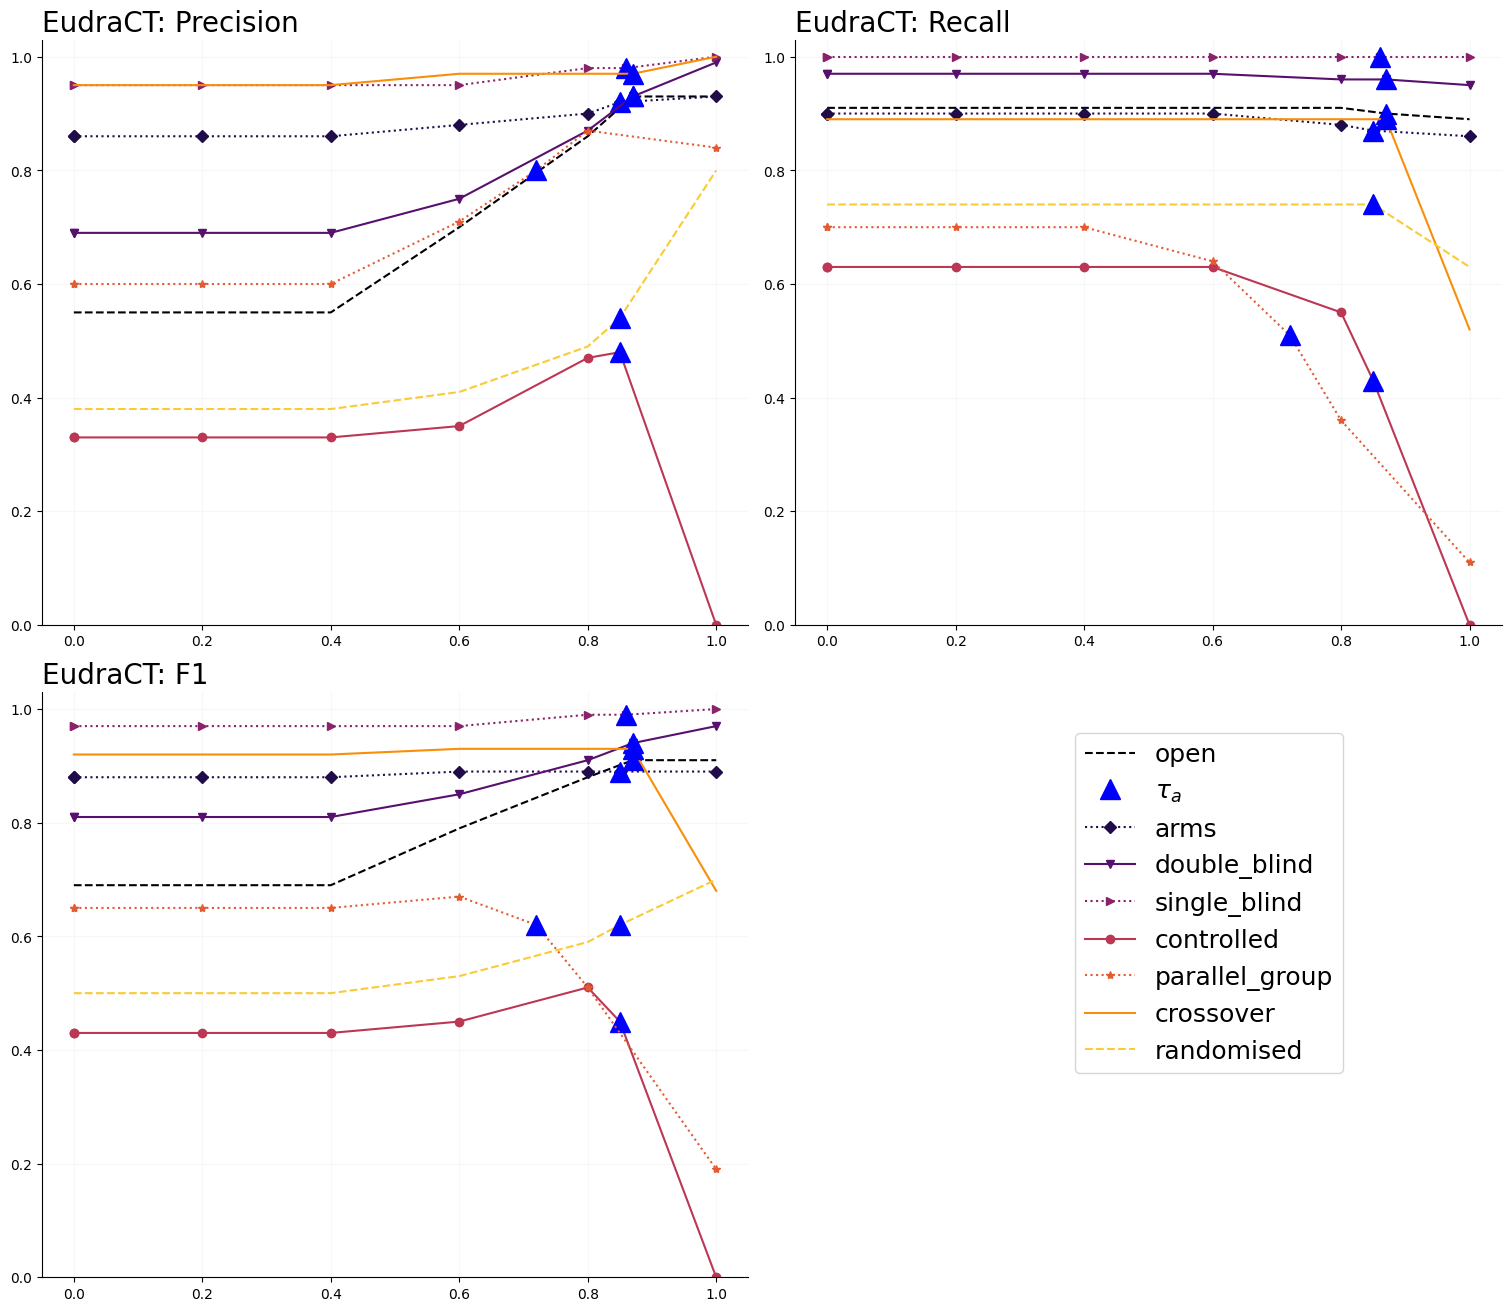

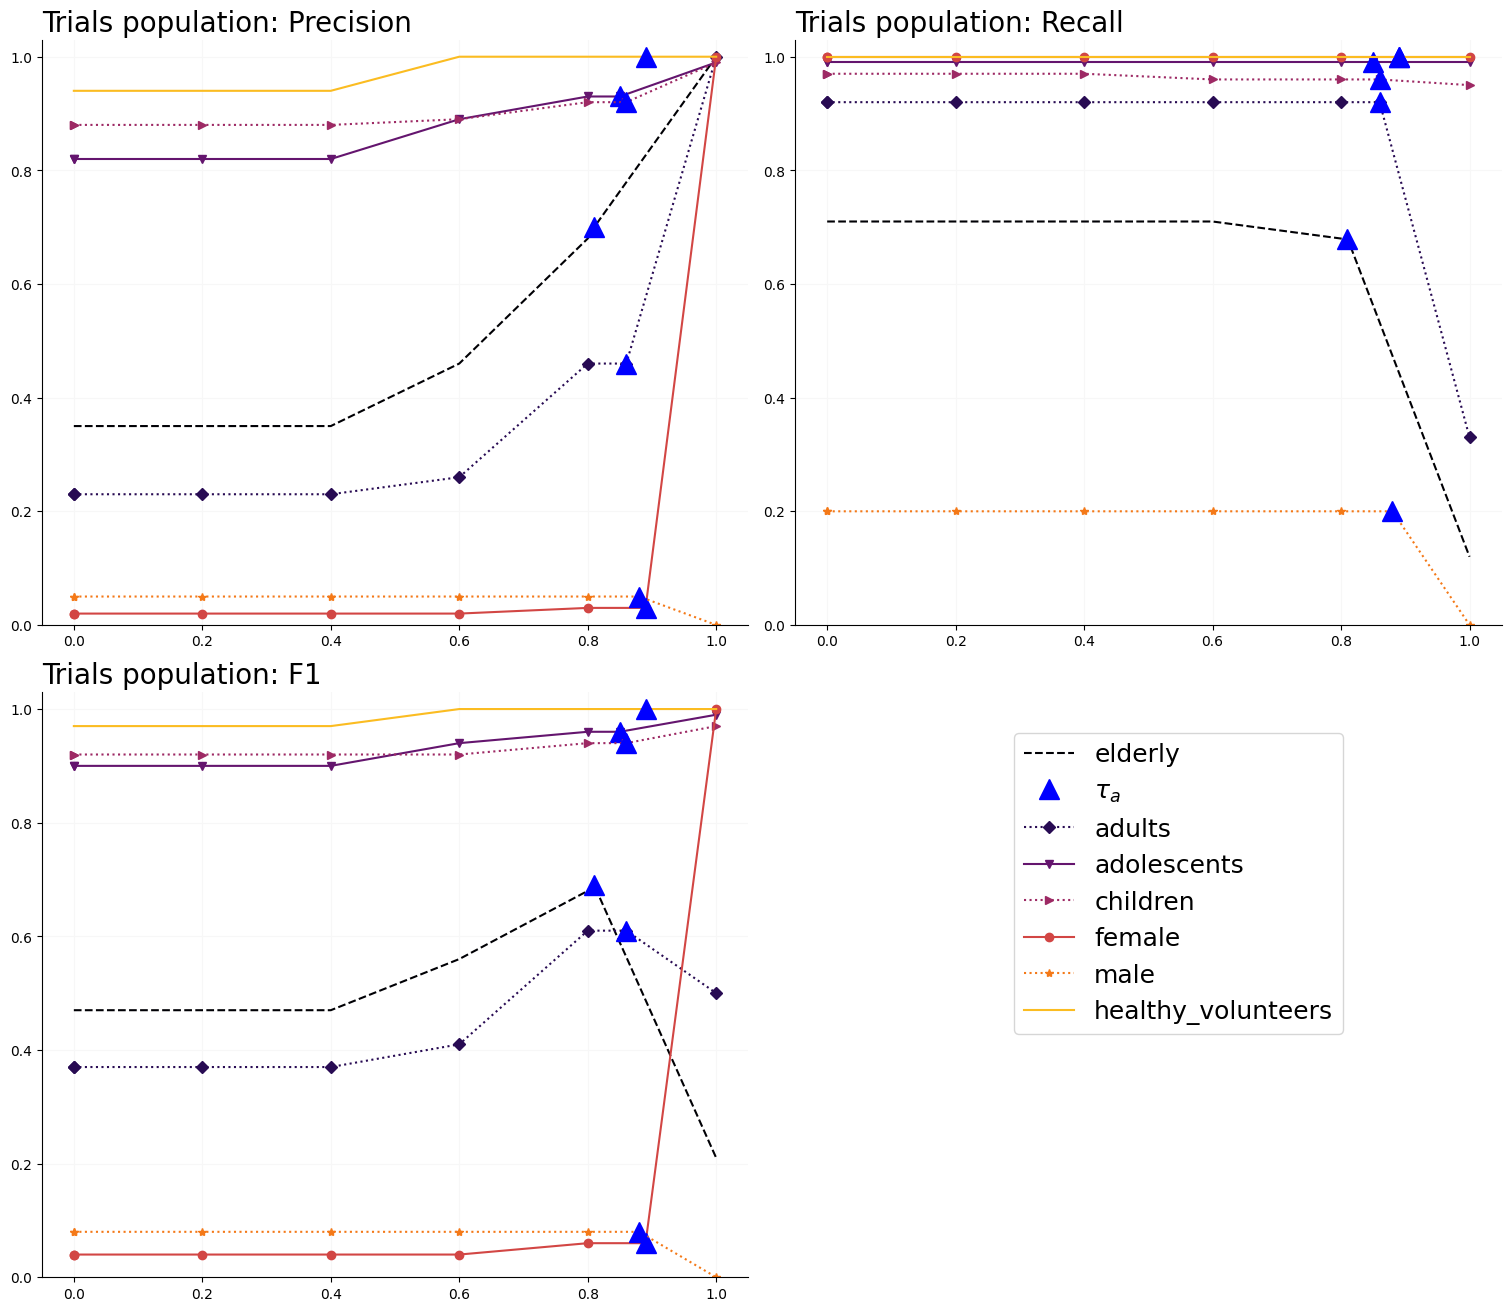

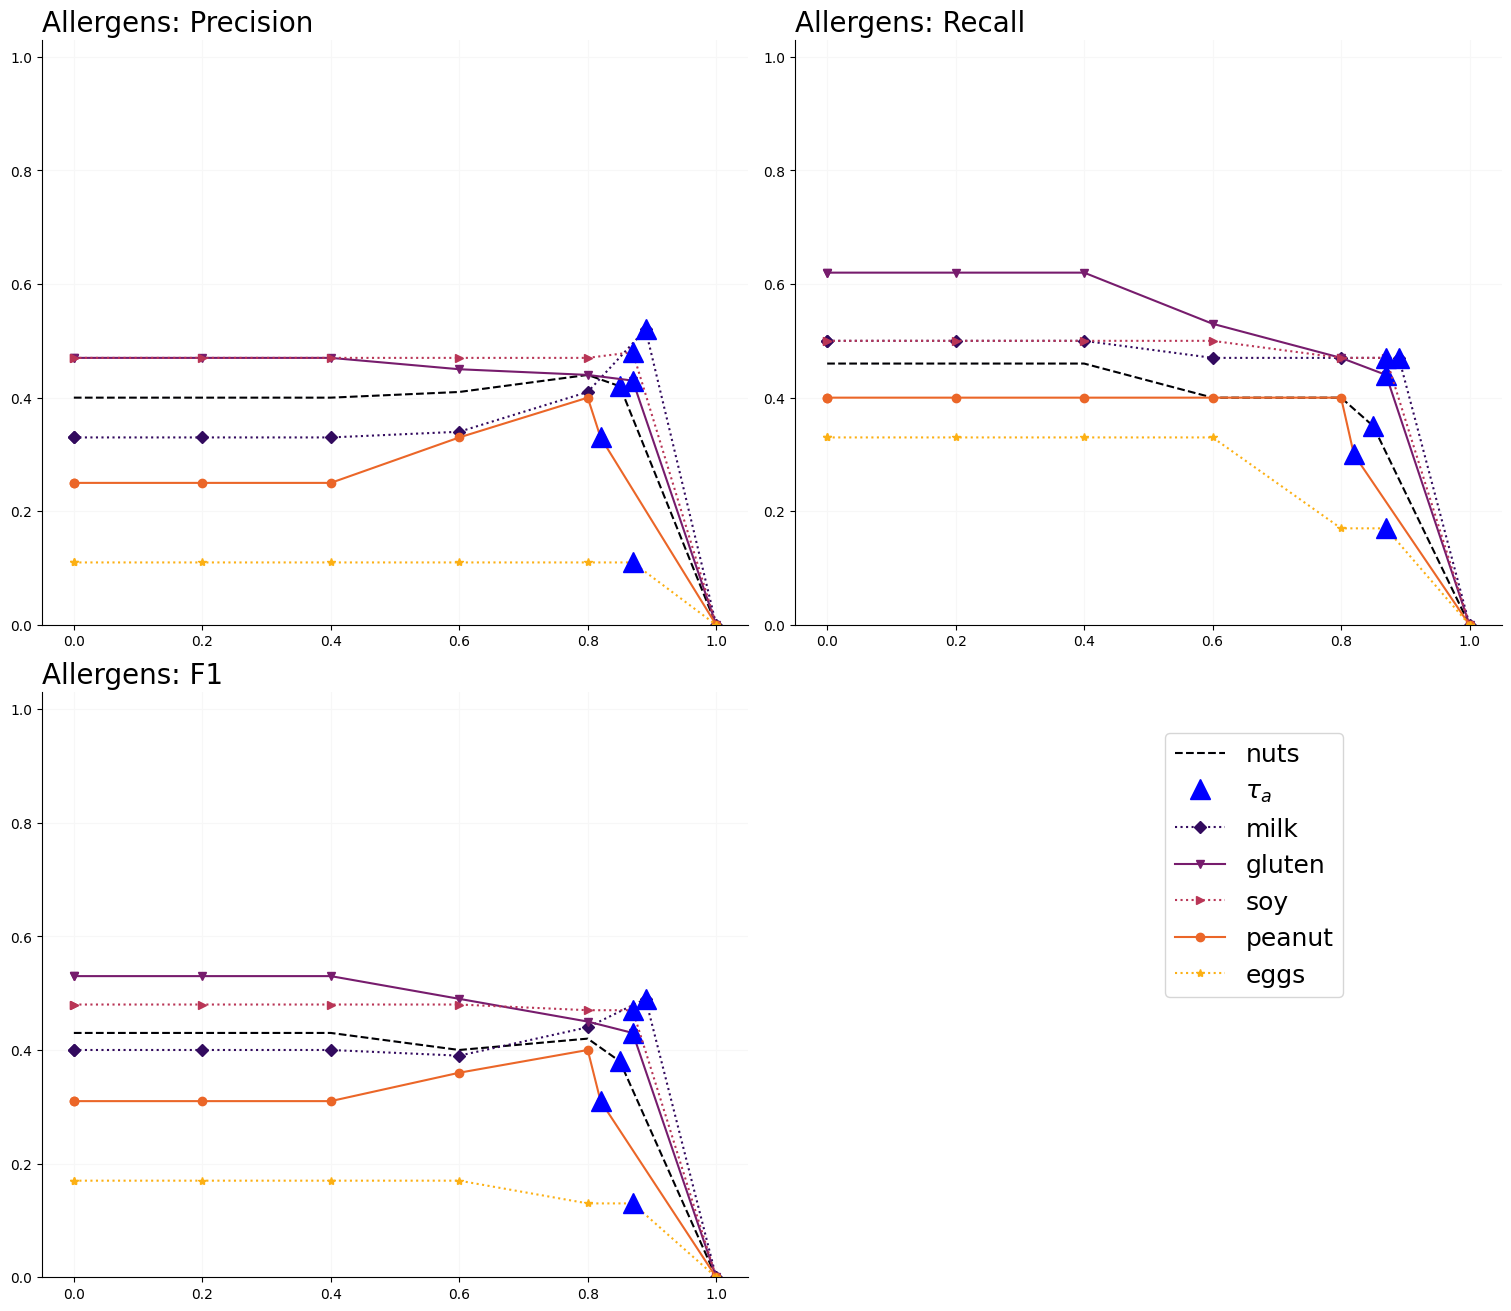

In [37]:
def find_metrics(proba, ths, precisions, recalls, f1s):
    metrics = [0,0,0]
    for i, t in enumerate(ths):
        if t == proba:
            return precisions[i], recalls[i], f1s[i]

saveDir= "/home/rnasfi/Documents/data_repair/paper/ieee_review/ACCESS_latex_template_20240429"
dnames = ['EudraCT', 'Trials population', 'Allergens']
fontsize = 20
for j in range(len(datasets)):        
    d = dataname[j]
    ml = m.get_best_ml(j)
    labels = datasets[d]['labels']
    colors = plt.cm.inferno(range(0, 256, 256 // len(labels)))
    print(d, labels)

    err = {}
    avg_proba = {}
    repairs = {}
    correct_repairs = {}
    precision = {}
    recall = {}
    f1 = {}
    ths = {}
    
    ncols = 2
    nrows = 2
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 13), layout='constrained')
    strategy = repair_strategies_naming[0]
    stra  = repair_strategies[0]
    ind = 0
    err[d], avg_proba[d], repairs[d], correct_repairs[d], precision[d], recall[d], f1[d], ths[d] = \
    get_stats(d, ml, stra, labels) 

    # extra indices
    k = 0
    markers = ['--', 'D:', 'v-', '>:', 'o-', '*:', '-']

    for i in range(len(labels)):
        a = labels[i]
        proba = avg_proba[d][a]
        ptau, rtau, f1tau = find_metrics(proba, ths[d][a], precision[d][a], recall[d][a], f1[d][a])
        mark = markers[k]


        ax[0, 0].plot(ths[d][a], precision[d][a], mark, color=colors[i], label = r'{}'.format(a) )
        ax[0, 1].plot(ths[d][a], recall[d][a], mark, color=colors[i])
        ax[1, 0].plot(ths[d][a], f1[d][a], mark, color=colors[i] )

        
        if i == 0 :
            ax[0, 0].plot(proba, ptau, '^', markersize=15, color='b', label = r'$\tau_a$')
        else:  ax[0, 0].plot(proba, ptau, '^', markersize=15, color='b') 
        ax[0, 1].plot(proba, rtau, '^', markersize=15, color='b') #, label = r'$\tau_c$: {}'.format(a) )
        ax[1, 0].plot(proba, f1tau, '^', markersize=15, color='b') #, label = r'$\tau_c$: {}'.format(a) )  
        
        k += 1
        if k == len(markers): k = 0
    # remove the axes top and the right ones
    ax[0, 0].spines[['top', 'right']].set_visible(False)
    ax[0, 1].spines[['top', 'right']].set_visible(False)
    ax[1, 0].spines[['top', 'right']].set_visible(False)
    ax[0][0].set_title(f"{dnames[j]}: Precision", loc = 'left', fontsize=fontsize)
    ax[0][1].set_title(f"{dnames[j]}: Recall", loc = 'left', fontsize=fontsize)
    ax[1][0].set_title(f"{dnames[j]}: F1", loc = 'left', fontsize=fontsize)
                       
    # Fig in the position (1,1) is empty and I place the legend there
    ax[1][1].set_visible(False)

    # Add grid with light color 
    ax[0][0].grid(True, color='0.97')
    ax[0][1].grid(True, color='0.97')
    ax[1][0].grid(True, color='0.97')
    ax[0][0].set_ylim(bottom=0, top=1.03)
    ax[0][1].set_ylim(bottom=0, top=1.03)
    ax[1][0].set_ylim(bottom=0, top=1.03)

    

    fig.legend(fontsize=18, bbox_to_anchor=(0.9, 0.45), ncol=1, frameon=True) 
    plt.savefig(f'{saveDir}/{d}_different_thresholds.eps', format='eps')
    plt.savefig(f'./figs/{d}/{d}_different_thresholds.eps', format='eps')
 #plt.show()   

#### find optimal threshold

In [ ]:
def find_best_index(list):
    m = max(list)
    b = 0
    for l in range(len(list)):
        if m == list[l]:
            b = l
    return b
    

In [ ]:
data_index = 0
dataname = datasets[data_index]
attr = data_labels[datasets[data_index]]
total_tuples = dt.read_data_csv(datasets[0], "test", False).shape[0]
_with = 'with_constraints'
ml = m.get_best_ml(data_index)
a = random.choice(attr)

f = open(f"./results/{datasets[data_index]}/{datasets[data_index]}_stats_{ml}_{_with}.json")

stats = json.load(f)

f.close()

stats[a]['F-1'], find_best_index(stats[a]['F-1'])

In [ ]:
thc_best = []
thf1_best = []
thp_best = []
thr_best = []
err_label = []
fig, ax = plt.subplots()
fig, ax1 = plt.subplots()
markers = ['o', 'x', '+', 'v', '^', '<', '>', 's', 'd']

for ind, a in enumerate(attr):
    x = [i * 100 for i in stats[a]['threshold']]
    err_label.append(round(int(stats[a]['errors'])/total_tuples,5))
    err_ratio = [round(int(stats[a]['errors'])/total_tuples,3) for _ in range(len(stats[a]['threshold']))]
    repair_ratio = [round(int(i)/total_tuples,3) for i in stats[a]['repairs'] ]

    # index for best performance
    p = find_best_index(stats[a]['precision'])
    r = find_best_index(stats[a]['recall'])
    f = find_best_index(stats[a]['F-1'])
    # threshold for best performance
    thp_best.append(round(stats[a]['threshold'][p],3))
    thr_best.append(round(stats[a]['threshold'][r],3))
    thf1_best.append(round(stats[a]['threshold'][f],3))
 
    ax.plot(x, stats[a]['precision'], markers[ind], markersize = 10, ls = 'dotted', label = f"{a} - {stats[a]['errors']} ({str(err_ratio[0])}%)" )
    ax1.plot(x, stats[a]['recall'], markers[ind], markersize = 10, ls = 'dotted', label = f"{a} - {stats[a]['errors']} ({str(err_ratio[0])}%)" )


ax.set(xlabel='threshold', ylabel='Precision')
ax1.set(xlabel='threshold', ylabel='Recall')
ax.spines[['top','right']].set_visible(False)
ax1.spines[['top','right']].set_visible(False)
xticks = [round(i,3) for i in stats[a]['threshold']]
print('xticks:', xticks, x)
# ax.set_xscale('log')
#ax1.set_xscale('log')
#ax.set_yscale('log')
#ax.grid()
#ax1.grid()

ax1.set_xticks(x, xticks, rotation=90, fontsize=8)
ax.legend(fancybox = True, bbox_to_anchor=(1.1, 0.7), shadow = True, framealpha = 1)
ax1.legend(fancybox = True, bbox_to_anchor=(1.1, 0.7), shadow = True, framealpha = 1)
    #plt.title(f"{a} - {stats[a]['errors']} ({str(err_ratio[0])}%)")
    
    
plt.show()
#plt.savefig('figs/population_precision_thresholds', format='svg')

#### optimal_metrcis = fct(error_ratio)

In [ ]:
# sort lists
import itertools


listf = sorted(zip(*[err_label, thf1_best]))
new_xf, new_yf = list(zip(*listf))

listp = sorted(zip(*[err_label, thp_best]))
new_xp, new_yp = list(zip(*listp))

listr = sorted(zip(*[err_label, thr_best]))
new_xr, new_yr = list(zip(*listr))

In [ ]:
fig, ax = plt.subplots()
ax.plot(new_xr, new_yr, '->', markersize=15, color = 'maroon', label = 'R')
ax.plot(new_xp, new_yp, '-+', markersize=15, color = 'olive', label = 'P')
ax.plot(new_xf, new_yf, '.', markersize=15, color = 'grey', label = 'F')

ax.set(ylabel='thresholds', xlabel ='error ratio')

ax.set_xscale('log')
ax.set_yscale('log')
#ax.grid()
plt.legend(fancybox = True, bbox_to_anchor=(1.5, 0.5))
plt.show()